In [ ]:
#TASK_CODESOFT-Movie Rating Prediction


In [ ]:
#Data Loading & Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import chardet

with open("/content/sample_data/IMDb Movies India.csv", 'rb') as f:
    result = chardet.detect(f.read())

df=pd.read_csv("/content/sample_data/IMDb Movies India.csv",encoding=result['encoding'])


In [ ]:
print(df.head(10))

                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
7                      .in for Motion  (2008)   59 min   
8                  ?: A Question Mark  (2012)   82 min   
9                            @Andheri  (2014)  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Dra

In [12]:
print(df.tail(6))

                      Name    Year Duration                 Genre  Rating  \
15503      Zulm Ki Zanjeer  (1989)  125 min  Action, Crime, Drama     5.8   
15504  Zulm Ko Jala Doonga  (1988)      NaN                Action     4.6   
15505                Zulmi  (1999)  129 min         Action, Drama     4.5   
15506            Zulmi Raj  (2005)      NaN                Action     NaN   
15507        Zulmi Shikari  (1988)      NaN                Action     NaN   
15508         Zulm-O-Sitam  (1998)  130 min         Action, Drama     6.2   

      Votes         Director           Actor 1         Actor 2        Actor 3  
15503    44  S.P. Muthuraman       Chiranjeevi      Jayamalini    Rajinikanth  
15504    11    Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505   655       Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506   NaN       Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507   NaN              NaN               NaN             N

In [13]:
print(df.shape)

(15509, 10)


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [16]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [17]:
print(df["Rating"].value_counts())

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [39]:
print(df.isna().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [18]:
df = df.dropna()

In [32]:
features = df[['Genre', 'Director', 'Actor 1']]
target = df['Rating']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [36]:
encoder = OneHotEncoder(sparse=False, drop='first')
features_encoded = encoder.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.0052400070493523e+26


In [54]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64


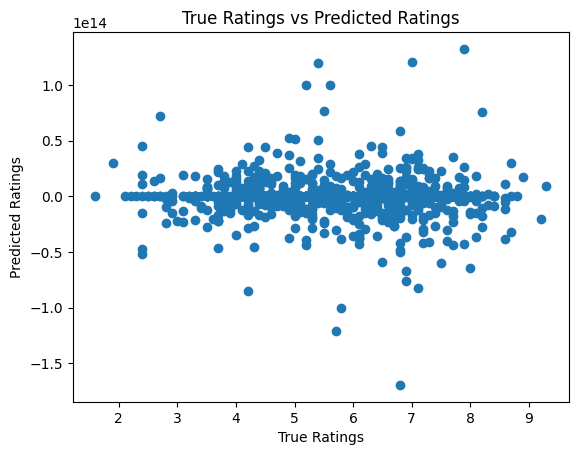

In [47]:
plt.scatter(y_test, predictions)
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("True Ratings vs Predicted Ratings")
plt.show()

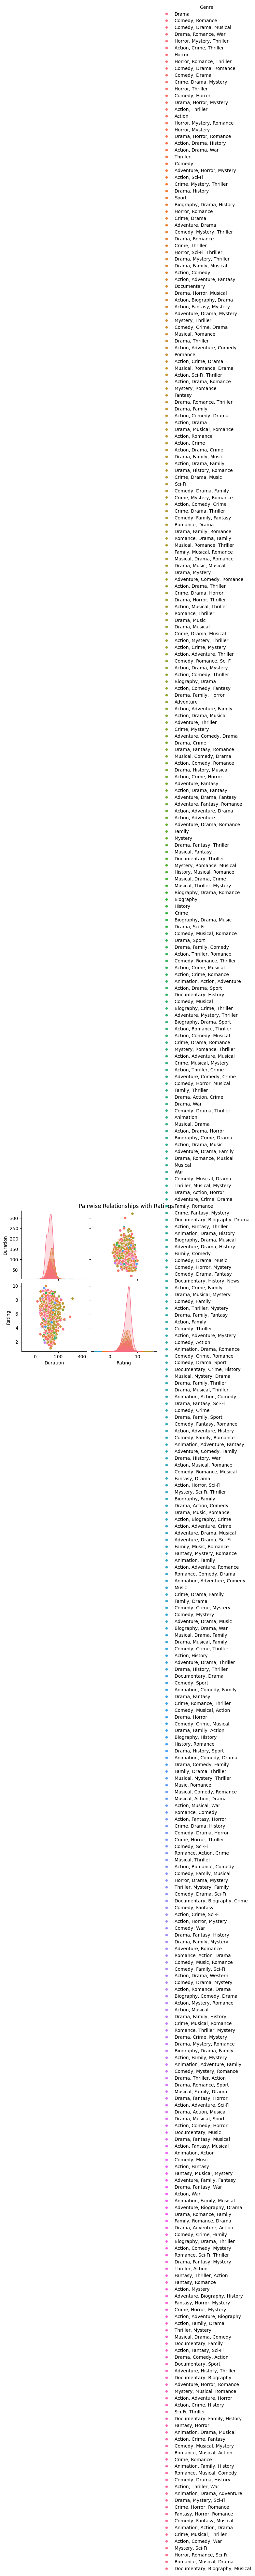

In [49]:
features = df[['Genre', 'Director', 'Duration', 'Rating']]
sns.pairplot(features, height=2.5, hue='Genre', markers='o')
plt.suptitle('Pairwise Relationships with Ratings', y=1.02)
plt.show()

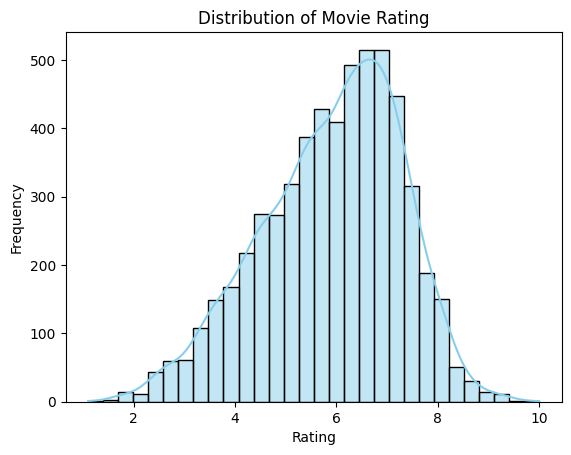

In [52]:
sns.histplot(data=df, x='Rating', kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()